In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

import spacy
from spacy.lang.en import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Modelling
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn. feature_extraction. text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
# xgboost
import xgboost as xgb
import keras
# Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

In [ ]:
from datetime import datetime
import time
import re

In [ ]:
from collections import Counter
import string
import scipy.sparse

In [ ]:
from textblob import TextBlob

In [ ]:
!pip install pyLDAvis

In [ ]:
from gensim import corpora , models
from gensim.similarities import MatrixSimilarity
from gensim import matutils

In [ ]:
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim_models

In [ ]:
import pickle

import warnings
warnings. filterwarnings("ignore")
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging. ERROR)
from IPython.display import clear_output
clear_output()

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/GrammarandProductReviews (1).csv'
df = pd.read_csv(file_path)

print(df.head())

                     id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   

                         

In [ ]:
df.shape

(71044, 25)

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             477
reviews.userCity        65634
reviews.userProvince    70595
reviews.username          102
upc                         2
dtype: int64


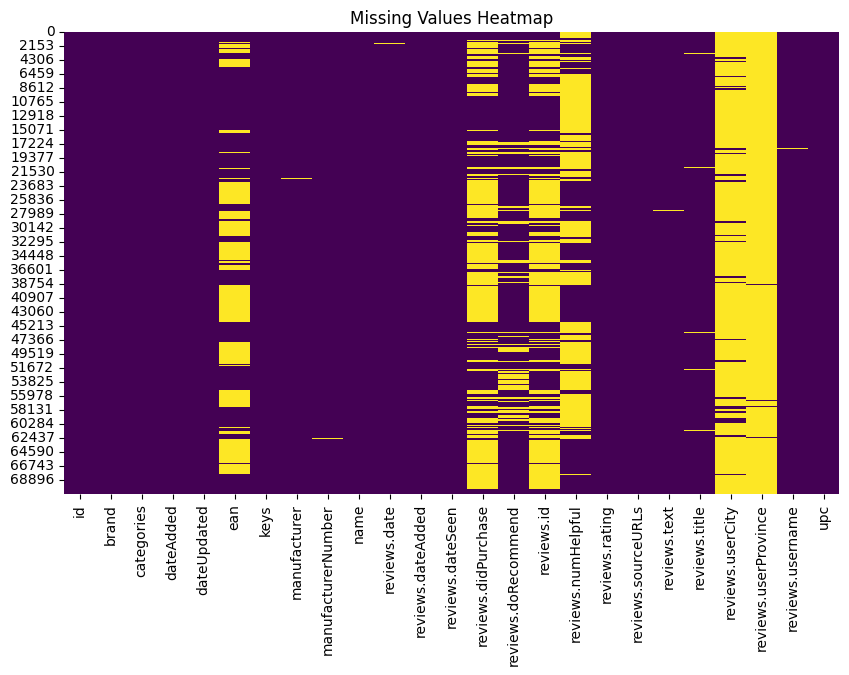


Percentage of missing values:
id                       0.000000
brand                    0.000000
categories               0.000000
dateAdded                0.000000
dateUpdated              0.000000
ean                     45.012950
keys                     0.000000
manufacturer             0.198469
manufacturerNumber       0.285738
name                     0.000000
reviews.date             0.094308
reviews.dateAdded        0.000000
reviews.dateSeen         0.000000
reviews.didPurchase     54.735094
reviews.doRecommend     14.941445
reviews.id              54.735094
reviews.numHelpful      54.242441
reviews.rating           0.000000
reviews.sourceURLs       0.000000
reviews.text             0.050673
reviews.title            0.671415
reviews.userCity        92.385001
reviews.userProvince    99.367997
reviews.username         0.143573
upc                      0.002815
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
# Check for missing values
print(df.isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Calculate the percentage of missing values
missing_values_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values:")
print(missing_values_percent)

# Visualize outliers using box plots (example for a numerical column)
# Replace 'score' with the actual name of your numerical column if it exists
if 'score' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['score'])
    plt.title('Box Plot of Score')
    plt.show()


In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
id                      0
brand                   0
categories              0
dateAdded               0
dateUpdated             0
ean                     0
keys                    0
manufacturer            0
manufacturerNumber      0
name                    0
reviews.date            0
reviews.dateAdded       0
reviews.dateSeen        0
reviews.didPurchase     0
reviews.doRecommend     0
reviews.id              0
reviews.numHelpful      0
reviews.rating          0
reviews.sourceURLs      0
reviews.text            0
reviews.title           0
reviews.userCity        0
reviews.userProvince    0
reviews.username        0
upc                     0
dtype: int64


In [ ]:
def scrub_words(text):
  text = re.sub("(<.*?>)","",text)
  text = re.sub("(\\W|\\d)"," ",text)
  text = text.strip()
  return text

In [ ]:
def avg_word(sentence):
  words = sentence.split()
